In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('d:/maschineLearning/zoomcamp/week6/\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [62]:
df.shape

(20640, 10)

In [63]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [64]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [65]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [66]:
columns =['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 
'median_income', 'median_house_value','ocean_proximity']
columns

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

# Data preparation

In [67]:
data = df[columns]
data

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [68]:
data.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [69]:
data = data.fillna(0)

In [70]:
data.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [71]:
data.median_house_value = np.log1p(data.median_house_value)
data.median_house_value

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [74]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [75]:
df_test.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,34.06,-118.36,39.0,2810.0,670.0,1109.0,624.0,3.2500,12.779876,<1H OCEAN
2151,36.78,-119.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,11.166215,INLAND
15927,37.73,-122.42,46.0,1819.0,411.0,1534.0,406.0,4.0132,12.343227,NEAR BAY


In [76]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,34.06,-118.36,39.0,2810.0,670.0,1109.0,624.0,3.2500,12.779876,<1H OCEAN
1,36.78,-119.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,11.166215,INLAND
2,37.73,-122.42,46.0,1819.0,411.0,1534.0,406.0,4.0132,12.343227,NEAR BAY
3,37.81,-122.28,52.0,340.0,97.0,200.0,87.0,1.5208,11.630717,NEAR BAY
4,33.82,-118.13,37.0,1530.0,290.0,711.0,283.0,5.1795,12.325636,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
4123,36.82,-119.70,25.0,2379.0,540.0,1482.0,484.0,2.3173,11.130215,INLAND
4124,34.04,-118.44,49.0,32.0,7.0,14.0,7.0,2.1875,12.323860,<1H OCEAN
4125,37.60,-122.37,26.0,15.0,3.0,11.0,3.0,5.0480,12.765691,NEAR OCEAN
4126,34.09,-118.10,42.0,1460.0,289.0,829.0,273.0,4.8750,12.334030,<1H OCEAN


In [77]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [78]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [79]:
from sklearn.feature_extraction import DictVectorizer

In [161]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [162]:
dv.feature_names_

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [82]:
X_test[0].round(3)

array([ 6.2400e+02,  3.9000e+01,  3.4060e+01, -1.1836e+02,  3.2500e+00,
        1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        1.1090e+03,  6.7000e+02,  2.8100e+03])

# Question1

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import roc_auc_score

In [84]:
dt = DecisionTreeRegressor(max_depth=1)

In [85]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [86]:
type(y_train)

numpy.ndarray

In [87]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out()))) #Q1

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



In [88]:
# Answer question1 ocean_proximity=INLAND

# Question 2

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [92]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-10)

In [93]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-10, random_state=1)

In [95]:
y_pred = rf.predict(X_val)

In [99]:
rmse = np.sqrt(mean_squared_error(y_pred, y_val))
rmse   #Q2

0.24573834331838432

In [100]:
# Answer question2 0,25

# Question 3

In [102]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state = 1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    scores.append((n, rmse))

In [104]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.245738
1,20,0.239262
2,30,0.235717
3,40,0.234583
4,50,0.233104
5,60,0.232843
6,70,0.232384
7,80,0.232527
8,90,0.232215
9,100,0.231968


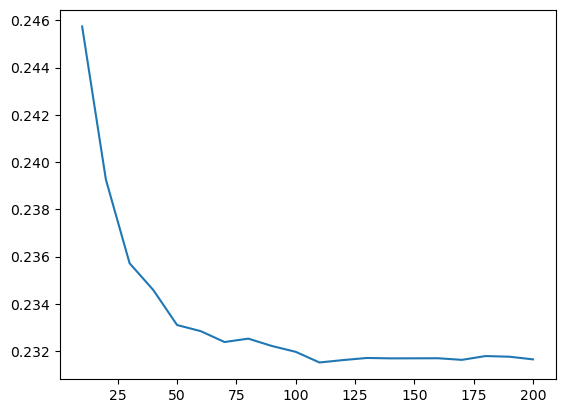

In [108]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [109]:
# Answer question3 70

In [111]:
scores = []

for depth in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, random_state = 1, max_depth=depth)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_pred, y_val))
        
        scores.append((n, depth, rmse))

In [121]:
columns = ['n_estimators','max_depth', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,n_estimators,max_depth,rmse
0,10,10,0.255042
1,20,10,0.252784
2,30,10,0.251647
3,40,10,0.251062
4,50,10,0.250192
...,...,...,...
75,160,25,0.231484
76,170,25,0.231440
77,180,25,0.231598
78,190,25,0.231603


In [122]:
df_scores_pivot = df_scores.pivot(index='n_estimators', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(5)

rmse                           
max_depth          10       15       20       25
n_estimators                                    
10            0.25504  0.24479  0.24633  0.24607
20            0.25278  0.23931  0.23894  0.23880
30            0.25165  0.23691  0.23589  0.23545
40            0.25106  0.23598  0.23484  0.23434
50            0.25019  0.23473  0.23341  0.23275
60            0.25010  0.23466  0.23343  0.23251
70            0.24992  0.23411  0.23295  0.23201
80            0.24959  0.23396  0.23288  0.23191
90            0.24931  0.23378  0.23268  0.23167
100           0.24915  0.23354  0.23247  0.23156
110           0.24890  0.23317  0.23214  0.23126
120           0.24897  0.23322  0.23212  0.23130
130           0.24910  0.23331  0.23216  0.23153
140           0.24921  0.23325  0.23198  0.23146
150           0.24919  0.23320  0.23203  0.23151
160           0.24911  0.23314  0.23200  0.23148
170           0.24890  0.23311  0.23194  0.23144
180           0.24901  0.23324  0.23212  0.23160
190           0.24908  0.23334  0.23205  0.23160
200           0.24911  0.23326  0.23189  0.23149

<AxesSubplot:xlabel='None-max_depth', ylabel='n_estimators'>

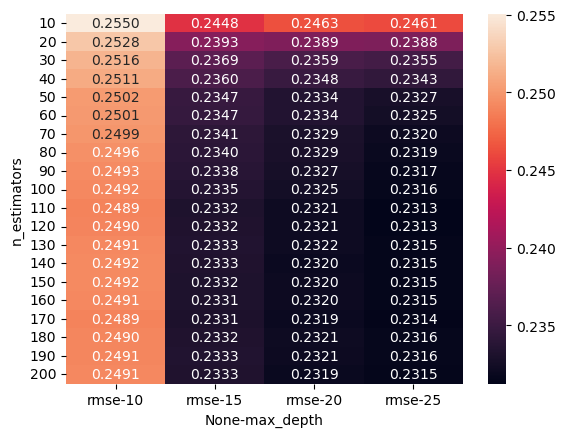

In [123]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.4f')

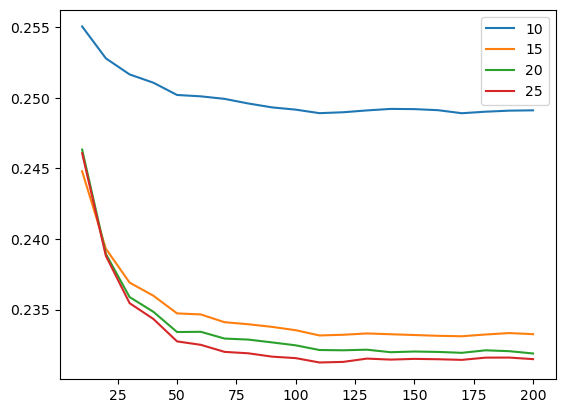

In [126]:
for depth in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == depth]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label = depth)
    
plt.legend()

In [127]:
# Answer question4: 25

# Question 5

In [129]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-10)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-10, random_state=1)

In [130]:
rf.feature_importances_

array([1.69573183e-02, 3.30938997e-02, 1.01333971e-01, 9.62649876e-02,
       3.62912907e-01, 3.00723750e-03, 3.10900842e-01, 3.56806263e-04,
       4.48661972e-04, 4.22762446e-03, 3.09180197e-02, 1.90412562e-02,
       2.05364687e-02])

In [132]:
df_importances = pd.DataFrame()

df_importances['feature'] = dv.get_feature_names_out()
df_importances['importances'] = rf.feature_importances_
df_importances

,feature,importances
0,households,0.016957
1,housing_median_age,0.033094
2,latitude,0.101334
3,longitude,0.096265
4,median_income,0.362913
5,ocean_proximity=<1H OCEAN,0.003007
6,ocean_proximity=INLAND,0.310901
7,ocean_proximity=ISLAND,0.000357
8,ocean_proximity=NEAR BAY,0.000449
9,ocean_proximity=NEAR OCEAN,0.004228


In [133]:
df_importances.sort_values(by='importances', ascending=False)

,feature,importances
4,median_income,0.362913
6,ocean_proximity=INLAND,0.310901
2,latitude,0.101334
3,longitude,0.096265
1,housing_median_age,0.033094
10,population,0.030918
12,total_rooms,0.020536
11,total_bedrooms,0.019041
0,households,0.016957
9,ocean_proximity=NEAR OCEAN,0.004228


In [135]:
# Answer question5: median_income

# Question 6

In [136]:
!pip install xgboost

In [137]:
import xgboost as xgb

In [182]:
features = dv.get_feature_names_out()
features

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'ocean_proximity=ISLAND',
       'ocean_proximity=NEAR BAY', 'ocean_proximity=NEAR OCEAN',
       'population', 'total_bedrooms', 'total_rooms'], dtype=object)

In [183]:
features[5] = 'ocean_proximity=or_less1H OCEAN'

In [186]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [189]:
wachlist = [(dtrain, 'train'), (dval, 'val')]

In [201]:
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
        
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    
    return df_results

In [198]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=wachlist)

In [202]:
scores = {}
scores['eta=0.3'] = parse_xgb_output(output)

In [204]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=wachlist)

In [205]:
scores['eta=0.1'] = parse_xgb_output(output)

In [206]:
scores

{'eta=0.3':     num_iter  train_rmse  val_rmse
 0          0     8.12733   8.13245
 1          5     1.40218   1.40741
 2         10     0.34481   0.35782
 3         15     0.23555   0.26044
 4         20     0.21580   0.24624
 5         25     0.20395   0.24099
 6         30     0.19440   0.23741
 7         35     0.18637   0.23562
 8         40     0.17983   0.23419
 9         45     0.17468   0.23279
 10        50     0.16934   0.23097
 11        55     0.16546   0.23039
 12        60     0.16177   0.22950
 13        65     0.15762   0.22857
 14        70     0.15323   0.22787
 15        75     0.15010   0.22755
 16        80     0.14564   0.22611
 17        85     0.14166   0.22579
 18        90     0.13892   0.22628
 19        95     0.13553   0.22630
 20        99     0.13299   0.22610,
 'eta=0.1':     num_iter  train_rmse  val_rmse
 0          0    10.44372  10.44938
 1          5     6.17513   6.17987
 2         10     3.65741   3.66135
 3         15     2.17500   2.17928
 4   

(0.0, 1.0)

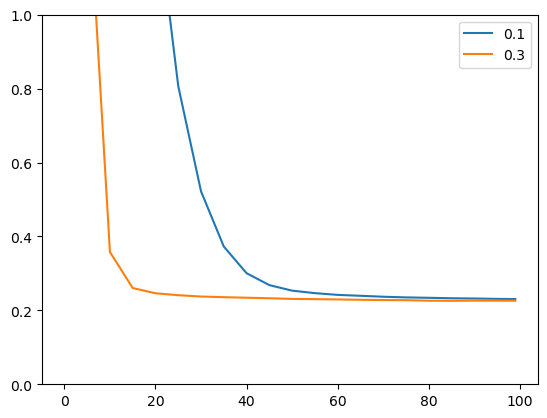

In [212]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_rmse, label = '0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_rmse, label = '0.3')

plt.legend()

plt.ylim([0, 1])


In [213]:
# Answer question6: 0.3